In [37]:
import pandas as pd

Data_Parsing = pd.read_excel('data/Data_TSUM.xlsx', sheet_name='Data_Parsing')
Data_Company = pd.read_excel('data/Data_TSUM.xlsx', sheet_name='Data_Company')

display(Data_Parsing.head())

def remove_wrong_symbols(s):
    wrong_symb_set = {'_' , '-' , '~' , '/', '\\'}
    s1 = ''
    for symb in s:
        if symb not in wrong_symb_set:
            s1 += symb
    return s1

   

,brand,Category,producer_id,producer_color,price
0,Valentino,Shoes,aaaaa1111_11,black,167
1,Valentino,Shoes,aaaaa1111_12,black,188
2,Valentino,Shoes,aaaaa1111_13,black,184
3,Valentino,Shoes,aaaaa1111_14,bla//ck,196
4,Valentino,Shoes,aaaaa1111_15,bla\\ck,250


,brand_x,Category_x,producer_id,producer_color,price,brand_y,Category_y,item_id,color_id,current price,delta
0,Valentino,Shoes,aaaaa111111,black,167,Valentino,Shoes,aaaaa111111,black,247,-32.388664
1,Valentino,Shoes,aaaaa111112,black,188,Valentino,Shoes,aaaaa111112,black,161,16.770186
2,Valentino,Shoes,aaaaa111113,black,184,Valentino,Shoes,aaaaa111113,black,234,-21.367521
3,Valentino,Shoes,aaaaa111114,black,196,Valentino,Shoes,aaaaa111114,black,167,17.365269
4,Valentino,Shoes,aaaaa111115,black,250,Valentino,Shoes,aaaaa111115,black,153,63.398693
...,...,...,...,...,...,...,...,...,...,...,...
70,Stone Island,Bags,sssss111131,red,164,Stone Island,Bags,sssss111131,red,165,-0.606061
71,Stone Island,Bags,sssss111132,red,158,Stone Island,Bags,sssss111132,red,196,-19.387755
72,Stone Island,Bags,sssss111133,red,194,Stone Island,Bags,sssss111133,red,236,-17.796610
73,Stone Island,Bags,sssss111134,red,256,Stone Island,Bags,sssss111134,red,222,15.315315


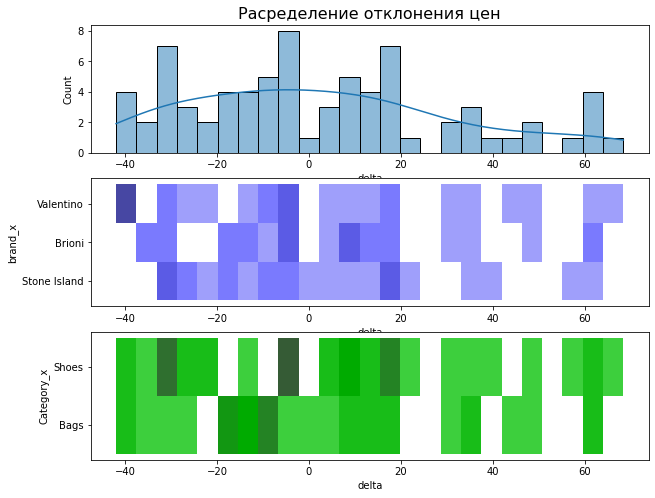

In [43]:
Data_Parsing['producer_id'] = Data_Parsing['producer_id'].apply(remove_wrong_symbols)
Data_Parsing['producer_color'] = Data_Parsing['producer_color'].apply(remove_wrong_symbols)

merged_data = Data_Parsing.merge(
    Data_Company, 
    left_on='producer_id',
    right_on='item_id',
    how='left'
    )

merged_data['delta'] = (merged_data['price'] /  merged_data['current price'] - 1)*100

display(merged_data)

# посмортим внешне на распределение отклонений
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))
sns.histplot(
    data=merged_data,
    x='delta',
    bins=25,
    kde=True,
    ax=axes[0]
);
axes[0].set_title('Расределение отклонения цен', fontsize=16)
sns.histplot(
    data=merged_data,
    x='delta',
    y = 'brand_x',
    bins=25,
    ax=axes[1],
    color = 'blue'
);
sns.histplot(
    data=merged_data,
    x='delta',
    y = 'Category_x',
    bins=25,
    ax=axes[2],
    color = 'green'
);


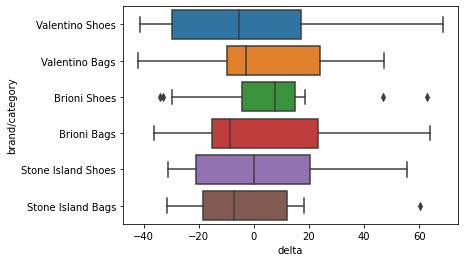

In [50]:
merged_data['brand/category'] = merged_data['brand_x'] + ' ' +  merged_data['Category_x']
sns.boxplot(
    data=merged_data,
    x='delta',
    y='brand/category'
);

По практике - тут нет никаких выбросов. Просто бардак в ценообразовании нашем. С ценами конкуренты мы вряд ли что-то сделаем, так что надо понять как мы будем реагировать исходя их картины и возможностей. И искать какой-то подход к ценообразованипю из какой-то логики. Эта логика может не опираться на цены конкурента конечно, но тогда почему бы не все дороже продавать? Если у нас другие преимущества.
В общем, везде слишком длинные усы на диараммах!

Но если исполнять задание буквально, что и найти выбросы, то есть супер знаковых точек в двух категориях/брендах: туфли бриони и сумки строун айленд.
Давайте найдем эти сверх отклонения:

In [55]:
for cat in set(merged_data['brand/category']):
    q25 = merged_data[ merged_data['brand/category'] == cat ]['delta'].quantile(0.25)
    q75 = merged_data[ merged_data['brand/category'] == cat ]['delta'].quantile(0.75)
    qtr = q75 - q25
    merged_data_ext = merged_data[ 
#                            (merged_data['brand/category'] == 'Brioni Shoes') & 
#                            (merged_data['delta'] < (merged_data[ merged_data['brand/category'] == 'Brioni Shoes' ]['delta'].quantile(0.25)))
#                            ]  
#merged_data_1
#merged_data[ merged_data['brand/category'] == 'Brioni Shoes' ]['delta'].quantile(0.25)



{'Brioni Bags',
 'Brioni Shoes',
 'Stone Island Bags',
 'Stone Island Shoes',
 'Valentino Bags',
 'Valentino Shoes'}